## 40. 因子分析（Factor Analysis）　続き

### <font color = blue>**3.** </font> Bayesian PCA

#### <font color = green>**1.** </font> PCAとPPCA

In [25]:
import numpy as np

from sklearn.datasets import load_iris, load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
iris = load_iris()
df_iris = DataFrame(iris.data)

sc = StandardScaler()
sc.fit(df_iris)
X_iris = sc.transform(df_iris)

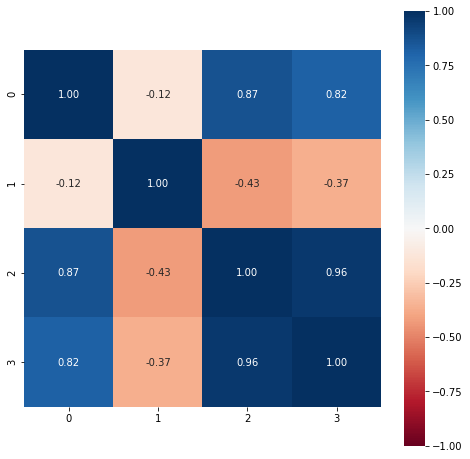

In [27]:
cr_iris = DataFrame(np.corrcoef(X_iris.T))

plt.figure(figsize=(8,8))
sns.heatmap(cr_iris, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.show()

In [28]:
pca_iris = PCA()
pca_iris.fit(X_iris)
pca_iris_W = np.fliplr(pca_iris.components_.T @ np.sqrt(np.diag(pca_iris.explained_variance_)))

fa_0_iris = FactorAnalysis(noise_variance_init=np.zeros(iris.data.shape[1]))
fa_0_iris.fit(X_iris)
fa_0_iris_W = np.fliplr(fa_0_iris.components_.T)

ppca_iris = FactorAnalysis()
ppca_iris.fit(X_iris)
ppca_iris_W = np.fliplr(ppca_iris.components_.T)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_factor_analysis.py:230: RuntimeWarning: divide by zero encountered in log
  ll += unexp_var + np.sum(np.log(psi))


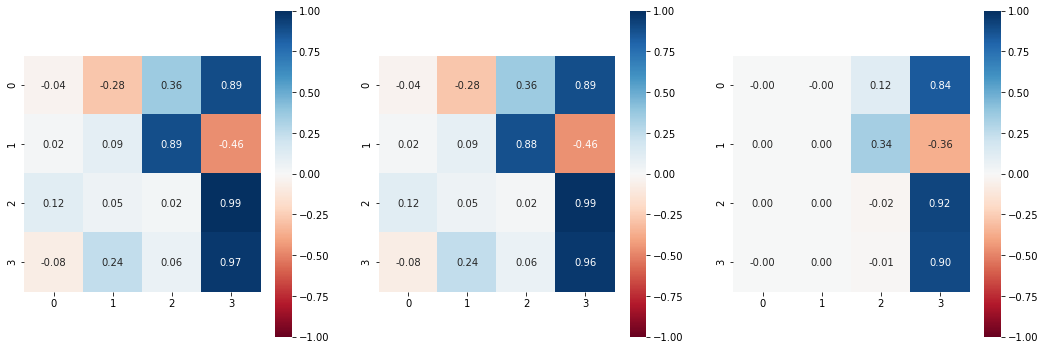

In [29]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
sns.heatmap(pca_iris_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 3, 2)
sns.heatmap(fa_0_iris_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 3, 3)
sns.heatmap(ppca_iris_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')

plt.show()

In [30]:
boston = load_boston()
df_boston = DataFrame(boston.data)

sc = StandardScaler()
sc.fit(df_boston)
X_boston = sc.transform(df_boston)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_factor_analysis.py:230: RuntimeWarning: divide by zero encountered in log
  ll += unexp_var + np.sum(np.log(psi))


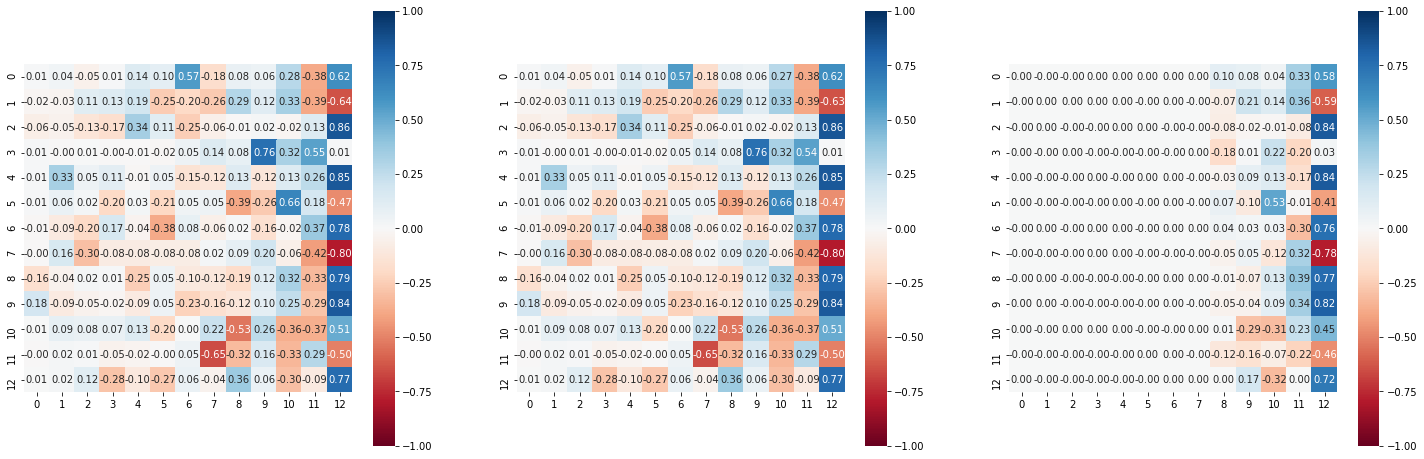

In [31]:
pca_boston = PCA()
pca_boston.fit(X_boston)
pca_boston_W = np.fliplr(pca_boston.components_.T @ np.sqrt(np.diag(pca_boston.explained_variance_)))

fa_0_boston = FactorAnalysis(noise_variance_init=np.zeros(boston.data.shape[1]))
fa_0_boston.fit(X_boston)
fa_0_boston_W = np.fliplr(fa_0_boston.components_.T)

ppca_boston = FactorAnalysis()
ppca_boston.fit(X_boston)
ppca_boston_W = np.fliplr(ppca_boston.components_.T)

plt.figure(figsize=(25,8))
plt.subplot(1, 3, 1)
sns.heatmap(pca_boston_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 3, 2)
sns.heatmap(fa_0_boston_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 3, 3)
sns.heatmap(ppca_boston_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')

plt.show()

#### <font color = green>**2.** </font> ヒントン図

In [ ]:
## 出典：https://qiita.com/ctgk/items/89c11192affe7f236852

In [ ]:
def hinton(matrix, max_weight=None, ax=None):
  """Draw Hinton diagram for visualizing a weight matrix."""
  ax = ax if ax is not None else plt.gca()

  if not max_weight:
    max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

  ax.patch.set_facecolor('gray')
  ax.set_aspect('equal', 'box')
  ax.xaxis.set_major_locator(plt.NullLocator())
  ax.yaxis.set_major_locator(plt.NullLocator())

  for (x, y), w in np.ndenumerate(matrix):
    color = 'white' if w > 0 else 'black'
    size = np.sqrt(np.abs(w) / max_weight)
    rect = plt.Rectangle([y - size / 2, x - size / 2], size, size,
                         facecolor=color, edgecolor=color)
    ax.add_patch(rect)

  ax.autoscale_view()
  ax.invert_yaxis()
  plt.xlim(-0.5, np.size(matrix, 1) - 0.5)
  plt.ylim(-0.5, len(matrix) - 0.5)
  plt.show()

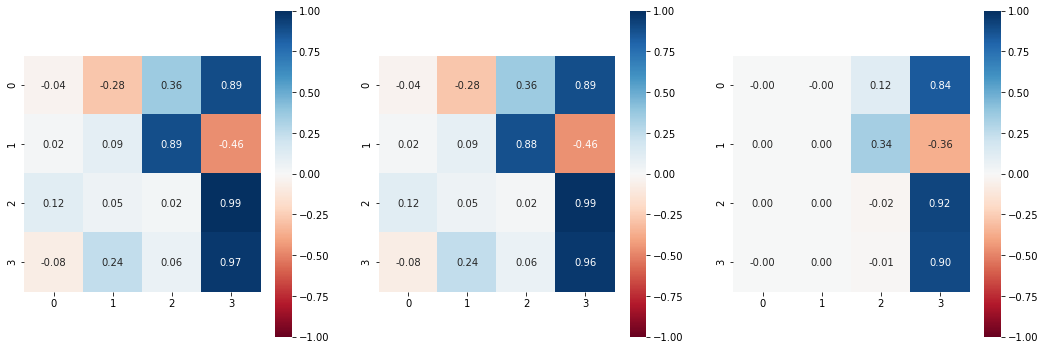

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
sns.heatmap(pca_iris_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 3, 2)
sns.heatmap(fa_0_iris_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 3, 3)
sns.heatmap(ppca_iris_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')

plt.show()

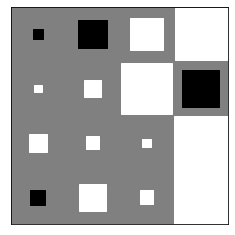

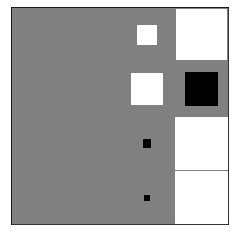

In [36]:
hinton(np.flipud(pca_iris_W))

hinton(np.flipud(ppca_iris_W))

plt.show()

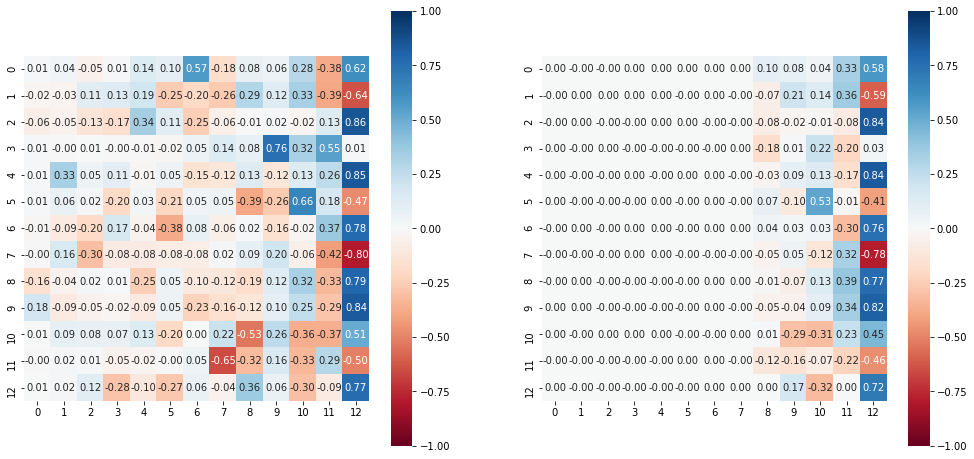

In [38]:
plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1)
sns.heatmap(pca_boston_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')
plt.subplot(1, 2, 2)
sns.heatmap(ppca_boston_W, annot=True, square=True, 
            vmin=-1,vmax=1, fmt='.2f', cmap='RdBu')

plt.show()

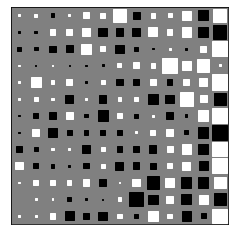

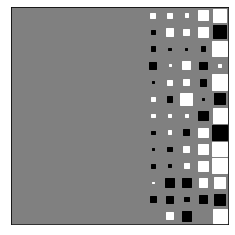

In [37]:
hinton(np.flipud(pca_boston_W))

hinton(np.flipud(ppca_boston_W))

plt.show()

## 42. 変分ベイズ（Variational Bayes）

### <font color = blue>**1.** </font> Simple Variational Inference for 2D Gaussian

In [ ]:
## 出典(Julia)：https://github.com/sammy-suyama/MLBlog/blob/master/src/demo_simpleVI.jl

In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def calc_KL(mu1, lambda1, mu2, lambda2):
  D = len(mu1)
  px_lnqx = 0.5 * np.log(np.linalg.det(lambda2)) \
              - 0.5 * ((mu1 - mu2).T @ lambda2 @ (mu1 - mu2) \
              + np.trace(lambda2 @ np.linalg.inv(lambda1)))
  px_lnpx = 0.5 * np.log(np.linalg.det(lambda1)) \
              - 0.5 * D
  KL = - (px_lnqx - px_lnpx)
  return KL

In [41]:
## creat truth distribution

D = 2 # dimension
theta = 2*np.pi/12  # tilt

A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

mu_true = [.0, .0]

lambda_true = np.linalg.inv(A @ np.linalg.inv(np.diag([1,10])) @ A.T)

In [42]:
## initialize

mu_h = np.random.randn(D)
lambda_h = np.zeros([D,D])

In [43]:
mu_h

array([ 0.01451049, -0.61355566])

In [44]:
## main iteration

max_iter = 10
KL = []
result = []

for i in range(max_iter):
  ## update
  mu_h[0] = mu_true[0] - 1/lambda_true[0,0] * lambda_true[0,1] * (mu_h[1] - mu_true[1])
  lambda_h[0,0] = lambda_true[0,0]
  mu_h[1] = mu_true[1] - 1/lambda_true[1,1] * lambda_true[1,0] * (mu_h[0] - mu_true[0])
  lambda_h[1,1] = lambda_true[1,1]
        
  ## calculate KL divergeince
  KL.append(calc_KL(mu_h, lambda_h, mu_true, lambda_true))

  ## store the results
  result.append([mu_h.copy(), np.linalg.inv(lambda_h).copy()])

In [45]:
def plot_results(result, truth):
  N = len(result)
  H = int(np.sqrt(N))
  W = int(N / H)+1
  f, ax = plt.subplots(H, W, figsize=(14,10))
  for i in range(H):
    for j in range(W):
      n = i * W + j
      if n < N:
        p = ax[i, j]
        p.set_title("{} of {}".format(n+1, N))
        plot_gaussian(p, result[n][0], result[n][1], "b", "p(z)")
        plot_gaussian(p, truth[0], truth[1], "r", "q(z)")
        p.set_xlim([-2, 2.5]) ###
        p.set_ylim([-1, 1.5]) ###
  f.show()

In [46]:
def plot_gaussian(p, Mu, Sigma, col, label):
  res = 100
  p.plot(Mu[0], Mu[1], "x", color=col)
  val, vec = np.linalg.eig(Sigma)
  dw = 2*np.pi/res
  w = np.array([dw * i for i in range(res)])
    
  c = 1.0
  a = np.sqrt(abs(c * val[0]))
  b = np.sqrt(abs(c * val[1]))
  P1 = a*np.cos(w)
  P2 = b*np.sin(w)
  P3 = vec.T @ np.array([P1, P2])
  P = P3.T + Mu
  p.plot(P[:, 0].T, P[:, 1].T, "-", color=col, label=label)

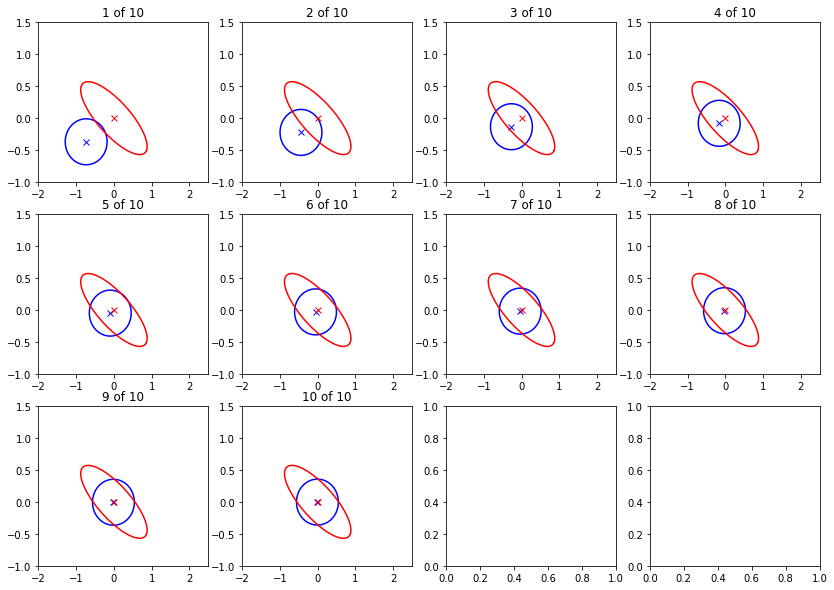

In [47]:
## visualize results

lambda_true_inv = np.linalg.inv(lambda_true)
plot_results(result, (mu_true, lambda_true_inv))

<Figure size 288x216 with 0 Axes>

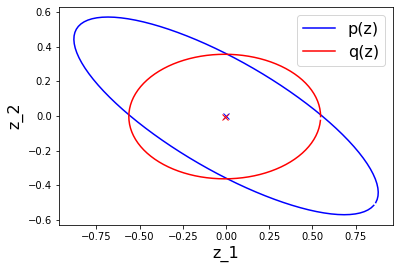

In [48]:
plt.figure(figsize=(4,3))
f, ax = plt.subplots(1, 1)
plot_gaussian(ax, mu_true, lambda_true_inv, "b", "p(z)")
plot_gaussian(ax, result[-1][0], result[-1][1], "r", "q(z)")
ax.set_xlabel("z_1", fontsize=16)
ax.set_ylabel("z_2", fontsize=16)
ax.legend(fontsize=16)
f.show()

<Figure size 288x216 with 0 Axes>

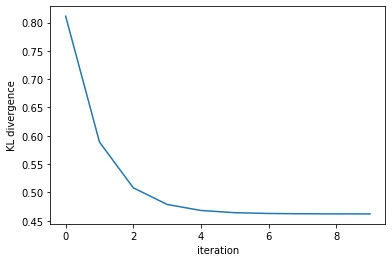

In [49]:
## KL divergence

plt.figure(figsize=(4,3))
f, ax = plt.subplots(1)
ax.plot(range(max_iter), KL)
ax.set_ylabel("KL divergence")
ax.set_xlabel("iteration")
f.show()

### <font color = blue>**2.** </font> 変分ベイズによるクラスタリング

In [ ]:
## 出典：https://tips-memo.com/python-vb-gmm

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
from scipy.special import digamma, gamma, logsumexp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

In [ ]:
var = 1
data_size = 1000
np.random.seed(0)

data_1 = np.random.normal(-5, var, data_size)
data_2 = np.random.normal(0, var, data_size)
data_3 = np.random.normal(5, var, data_size)

group1 = np.append(
    np.append([data_1], [data_2], 0), 
    [data_3], 0)

group2 = np.append(
    np.append([data_3], [data_1], 0), 
    [data_2], 0)

group3 = np.append(
    np.append([data_2], [data_3], 0), 
    [data_1], 0)

group4 = np.append(
    np.append([data_2], [data_1], 0), 
    [data_3], 0)

l = np.append(
      np.append(
        np.append(group1, group2, 1), 
        group3, 1), 
      group4, 1)
l = l.T
np.shape(l)

In [ ]:
labels = [1 for i in range(data_size)] \
          + [2 for i in range(data_size)] \
            + [3 for i in range(data_size)] \
              + [4 for i in range(data_size)]

In [ ]:
cm = plt.get_cmap("tab10")
fig = plt.figure()
ax = Axes3D(fig)
N = l.shape[0]

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color=cm(labels[n]), ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color="grey", ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
class VBGMM():
  def __init__(self, K=6, alpha0=0.1):
    self.K = K
    self.alpha0 = alpha0
  
  def init_params(self, X):
    self.N, self.D = X.shape
    self.m0 = np.random.randn(self.D)
    self.beta0 = np.array([1.0])
    self.W0 = np.eye(self.D)
    self.nu0 = np.array([self.D])
    
    self.N_k = (self.N / self.K) + np.zeros(self.K)
    
    self.alpha = np.ones(self.K) * self.alpha0
    self.beta = np.ones(self.K) * self.beta0
    self.m = np.random.randn(self.K, self.D)
    self.W = np.tile(self.W0, (self.K, 1, 1))
    self.nu = np.ones(self.K)*self.D
    
    self.Sigma = np.zeros((self.K, self.D, self.D))
    for k in range(self.K):
      self.Sigma[k] = la.inv(self.nu[k] * self.W[k])
    self.Mu = self.m
  
  def e_step(self, X):
    pi = digamma(self.alpha) - digamma(self.alpha.sum())
    Lambda_tilde = np.zeros((self.K))
    for k in range(self.K):
      digamma_sum = np.array([])
      for i in range(self.D):
        digamma_sum = np.append(digamma_sum, digamma((self.nu[k] + 1 - i)/2))
      A = np.sum(digamma_sum)
      B = self.D * np.log(2)
      C = np.log(la.det(self.W[k]))
      Lambda_tilde[k] = A + B + C
    rho = np.zeros((self.N, self.K))
    for n in range(self.N):
      for k in range(self.K):         
        gap = (X[n] - self.m[k])[:, None]
        A = -(self.D/(2*self.beta[k]))
        B = -(self.nu[k]/2)*(gap.T@self.W[k]@gap)
        rho[n][k] = pi[k] + 0.5*Lambda_tilde[k] + A + B
    r_log = rho - logsumexp(rho, axis=1)[:,None]
    r = np.exp(r_log)
    r[np.isnan(r)] = 1.0 / (self.K)
    return r
  
  def m_step(self, X, r):
      self.N_k = np.sum(r, axis=0, keepdims=True).T
      barx = (r.T @ X) / self.N_k
      S_list = np.zeros((self.N, self.K, self.D, self.D))
      for n in range(self.N):
        for k in range(self.K):
          gap = (X[n] - barx[k])[:, None]
          S_list[n][k] = r[n][k] * gap @ gap.T
      S = np.sum(S_list, axis=0) / self.N_k[:,None]
      self.alpha = self.alpha0 + self.N_k
      self.beta = self.beta0 + self.N_k
      for k in range(self.K):  
        self.m[k] = (1/self.beta[k]) * (self.beta0 * self.m0 + self.N_k[k] * barx[k])
      for k in range(self.K):
        gap = (barx[k] - self.m0)[:, None]
        A = la.inv(self.W0)
        B = self.N_k[k] * S[k]
        C = ((self.beta0*self.N_k[k]) / (self.beta0 + self.N_k[k])) * gap@gap.T
        self.W[k] = la.inv(A + B + C)
        self.nu[k] = self.nu0 + self.N_k[k]
      pi = self.alpha / np.sum(self.alpha, keepdims=True)
      return pi
  
  def calc(self, x, mu, sigma_inv, sigma_det):
    exp = -0.5*(x - mu).T@sigma_inv.T@(x - mu)
    denomin = np.sqrt(sigma_det)*(np.sqrt(2*np.pi)**self.D)
    return np.exp(exp)/denomin
  
  def gauss(self, X, mu, sigma):
    output = np.array([])
    sigma_inv = la.inv(sigma)
    sigma_det = la.det(sigma) + np.spacing(1) ####
    for i in range(self.N):
      output = np.append(output, self.calc(X[i], mu, sigma_inv, sigma_det))
    return output
  
  def mix_gauss(self, X, Mu, Sigma, Pi):
    output = np.array([Pi[i]*self.gauss(X, Mu[i], Sigma[i]) for i in range(self.K)])
    return output, np.sum(output, 0)[None,:]
  
  def log_likelihood(self, X, pi):
    for i in range(self.K):
      self.Sigma[i] = la.inv(self.nu[i] * self.W[i])
    self.Mu = self.m
    _, out_sum = self.mix_gauss(X, self.Mu, self.Sigma, pi)
    logs = np.array([np.log(out_sum[0][n]) for n in range(self.N)])
    return np.sum(logs)
  
  def fit(self, X, iter_max, thr):
    self.init_params(X)
    log_list = np.array([])
    pi = np.array([1/self.K for i in range(self.K)])
    log_list = np.append(log_list, self.log_likelihood(X, pi))
    count = 0
    for i in range(iter_max):
      r = self.e_step(X)
      pi = self.m_step(X, r)
      log_list = np.append(log_list, self.log_likelihood(X, pi))
      if np.abs(log_list[count] - log_list[count+1]) < thr:
        print("fit success Previous log-likelihood gap: {}"\
                .format(np.abs(log_list[count] - log_list[count+1])))  ####
        return count+1, log_list, r, pi, self.Mu, self.Sigma
      else:
        print("{}th Previous log-likelihood gap: {}"\
                .format(i, np.abs(log_list[count] - log_list[count+1])))  ####
        count += 1
        
  def classify(self, X):
    return np.argmax(self.e_step(X), 1)  

In [ ]:
model = VBGMM(K=8, alpha0=0.01)
n_iter, log_list, r, pi, Mu, Sigma = model.fit(l, iter_max=100, thr = 0.01)

In [ ]:
labels_predict = model.classify(l)
#print(n_iter)
#print(log_list)
len(set(labels_predict))

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color=cm(labels_predict[n]), ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
####################
# scikit-learnのライブラリを  #
# 使用した場合との比較図示 #
####################

In [ ]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [ ]:
GMM_4 = GaussianMixture(n_components=4)
GMM_8 = GaussianMixture(n_components=8)
BGMM_4 = BayesianGaussianMixture(n_components=4)
BGMM_8 = BayesianGaussianMixture(n_components=8)

In [ ]:
gmm_4_label = GMM_4.fit_predict(l)

fig = plt.figure()
ax = Axes3D(fig)

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color=cm(gmm_4_label[n]), ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
gmm_8_label = GMM_8.fit_predict(l)

fig = plt.figure()
ax = Axes3D(fig)

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color=cm(gmm_8_label[n]), ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
bgmm_4_label = BGMM_4.fit_predict(l)

fig = plt.figure()
ax = Axes3D(fig)

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color=cm(bgmm_4_label[n]), ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
bgmm_8_label = BGMM_8.fit_predict(l)
print("number of cluster: ", len(set(bgmm_8_label)))

fig = plt.figure()
ax = Axes3D(fig)

for n in range(N):
  ax.plot([l[n][0]], [l[n][1]], [l[n][2]], "o", color=cm(bgmm_8_label[n]), ms=1.5)
ax.view_init(elev=30, azim=45)
plt.show()

### <font color = blue>**3.** </font> トピックモデル：LDA（Latent Dirichlet Allocation : 潜在的ディリクレ配分法）

$\downarrow \downarrow$ 公式リファレンス $\downarrow \downarrow$\
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [ ]:
## 出典: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

In [ ]:
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

In [ ]:
# Use tf-idf features for NMF.

print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

In [ ]:
# Use tf (raw term count) features for LDA.

print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

In [ ]:
# Fit the NMF model

print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

In [ ]:
# Fit the NMF model

print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

In [ ]:
lda = LatentDirichletAllocation(n_components=n_components,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [ ]:
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')